In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()

# 

In [5]:
len(X_train)

60000

In [6]:
X_train=X_train/255
X_test=X_test/255

In [7]:
len(X_test)

10000

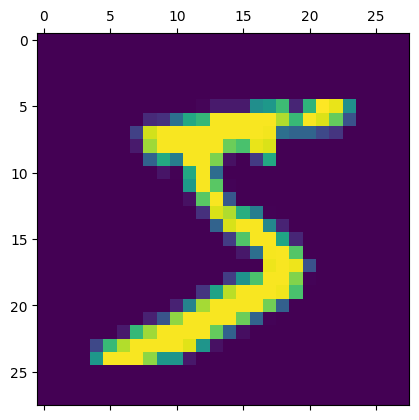

In [8]:
X_train[0].shape

plt.matshow(X_train[0])

In [9]:
Y_train[0]

5

In [10]:
x_train_flat=X_train.reshape(len(X_train),28*28)

In [11]:
x_train_flat.shape

(60000, 784)

In [12]:
x_test_flat=X_test.reshape(len(X_test),28*28)

In [13]:
x_test_flat.shape

(10000, 784)

In [14]:
model=keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )
model.fit(x_train_flat,Y_train,epochs=5)

C:\Users\2477205\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8106 - loss: 0.7213
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9121 - loss: 0.3104
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9191 - loss: 0.2867
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9231 - loss: 0.2741
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9278 - loss: 0.2645


In [15]:
model.evaluate(x_test_flat,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9142 - loss: 0.3032


[0.2661164104938507, 0.925599992275238]

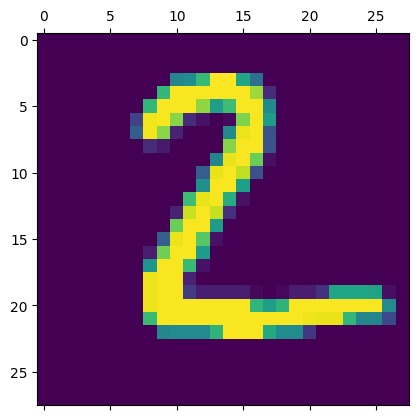

In [16]:
plt.matshow(X_test[1])

In [17]:
pred=model.predict(x_test_flat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [18]:
pred[1]

array([5.3943837e-01, 2.9817161e-03, 9.9952525e-01, 3.9117041e-01,
       9.2209512e-10, 8.6682540e-01, 9.1042119e-01, 3.0289814e-12,
       1.6394268e-01, 3.7036887e-09], dtype=float32)

In [19]:
np.argmax(pred[1])

2

In [20]:
y_pred=[np.argmax(i) for i in pred]

In [23]:
cm=tf.math.confusion_matrix(labels=Y_test,predictions=y_pred)

Text(95.72222222222221, 0.5, 'Truth')

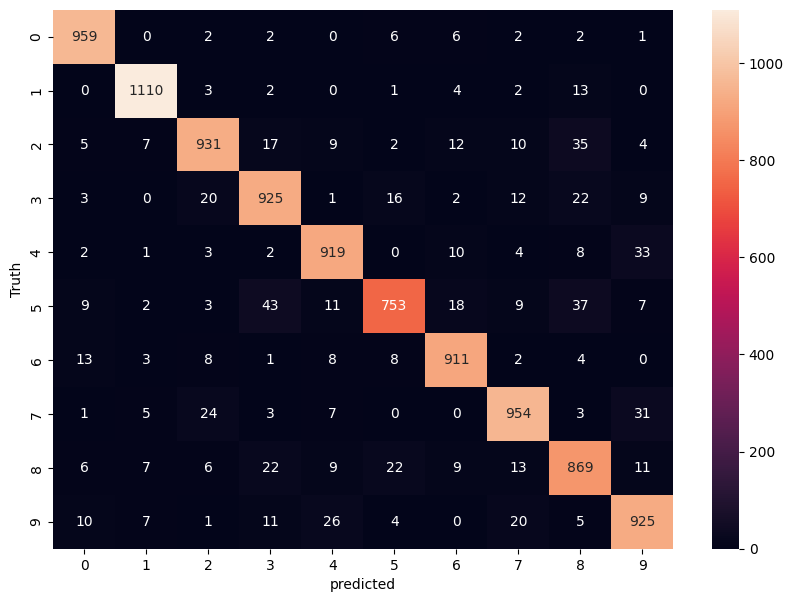

In [24]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [25]:
model=keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, activation='sigmoid'),
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )
model.fit(x_train_flat,Y_train,epochs=5)

C:\Users\2477205\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8701 - loss: 0.4552
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9627 - loss: 0.1281
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9751 - loss: 0.0833
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9811 - loss: 0.0633
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9849 - loss: 0.0479


In [30]:
model.evaluate(x_test_flat,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9704 - loss: 0.0990


[0.08421401679515839, 0.9745000004768372]

In [31]:
pred=model.predict(x_test_flat)
y_pred=[np.argmax(i) for i in pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [32]:
cm=tf.math.confusion_matrix(labels=Y_test,predictions=y_pred)

Text(95.72222222222221, 0.5, 'Truth')

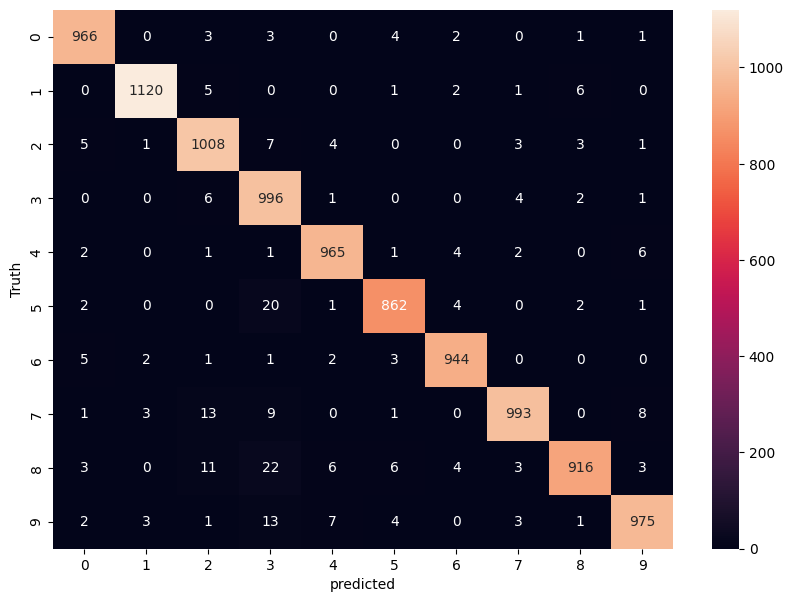

In [33]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')